In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"C:\Users\jonat\Downloads\CleanedFireIncidentData (1).csv")
data

,Unnamed: 0,Borough,Borough num,Time,Time num,Alarm Source,Alarm Source num,Incident Classification,Incident Classification num,Dispatch Response Time,Incident Response Time,Incident Travel Time,Engines Assigned,Ladders Assigned,Other Units Assigned,Valid Response Time
0,0,RICHMOND / STATEN ISLAND,0.864650,10 PM - 2 AM,0.842553,Phone,0.957787,NonMedical Emergencies,0.951872,40,397,357,1.0,1.0,0.0,1
1,1,BRONX,0.829616,10 PM - 2 AM,0.842423,PD Link/Medical,0.687040,Medical MFAs,0.879852,10,260,250,1.0,0.0,0.0,1
2,2,BROOKLYN,0.860628,10 PM - 2 AM,0.842423,PD Link/Medical,0.687040,Medical Emergencies,0.695660,7,146,139,1.0,0.0,0.0,1
3,3,QUEENS,0.850763,10 PM - 2 AM,0.842553,Phone,0.957787,NonMedical MFAs,0.955968,52,327,275,3.0,2.0,1.0,1
4,4,QUEENS,0.850645,10 PM - 2 AM,0.842616,Private Fire Alarm,0.985807,NonMedical Emergencies,0.951918,112,391,279,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861251,10275083,MANHATTAN,0.803480,10 PM - 2 AM,0.842483,EMS,0.868442,Medical Emergencies,0.695678,8,263,254,1.0,0.0,0.0,0
9861252,10275086,BROOKLYN,0.860588,10 PM - 2 AM,0.842553,ERS,0.945524,NonMedical MFAs,0.955968,5,210,205,1.0,0.0,0.0,1
9861253,10275088,BROOKLYN,0.860638,10 PM - 2 AM,0.842786,EMS,0.869062,Medical Emergencies,0.695647,15,258,243,1.0,0.0,0.0,1
9861254,10275089,BROOKLYN,0.860628,10 PM - 2 AM,0.842547,PHONE,0.955177,NonStructural Fires,0.927389,22,303,281,1.0,0.0,0.0,1


In [3]:
data.columns

Index(['Unnamed: 0', 'Borough', 'Borough num', 'Time', 'Time num',
       'Alarm Source', 'Alarm Source num', 'Incident Classification',
       'Incident Classification num', 'Dispatch Response Time',
       'Incident Response Time', 'Incident Travel Time', 'Engines Assigned',
       'Ladders Assigned', 'Other Units Assigned', 'Valid Response Time'],
      dtype='object')

In [4]:
# data[['Dispatch Response Time',
#      'Incident Response Time', 'Incident Travel Time']] = data[['Dispatch Response Time',
#       'Incident Response Time', 'Incident Travel Time']].astype(int)

# data['Dispatch Response Time'] = data['Dispatch Response Time'].str.replace(',', '').astype(int)

In [5]:
data_columns = data[['Borough num', 'Alarm Source num', 
       'Incident Classification num', 'Engines Assigned',
       'Ladders Assigned', 'Other Units Assigned', 'Time num']]

X = data_columns
y = data['Valid Response Time']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [7]:
# Decision Tree Classification Model

dt = DecisionTreeClassifier(random_state=42)

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}" )

Decision Tree Accuracy: 0.8408398115453806


In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  16792  304183]
 [   9721 1641556]]


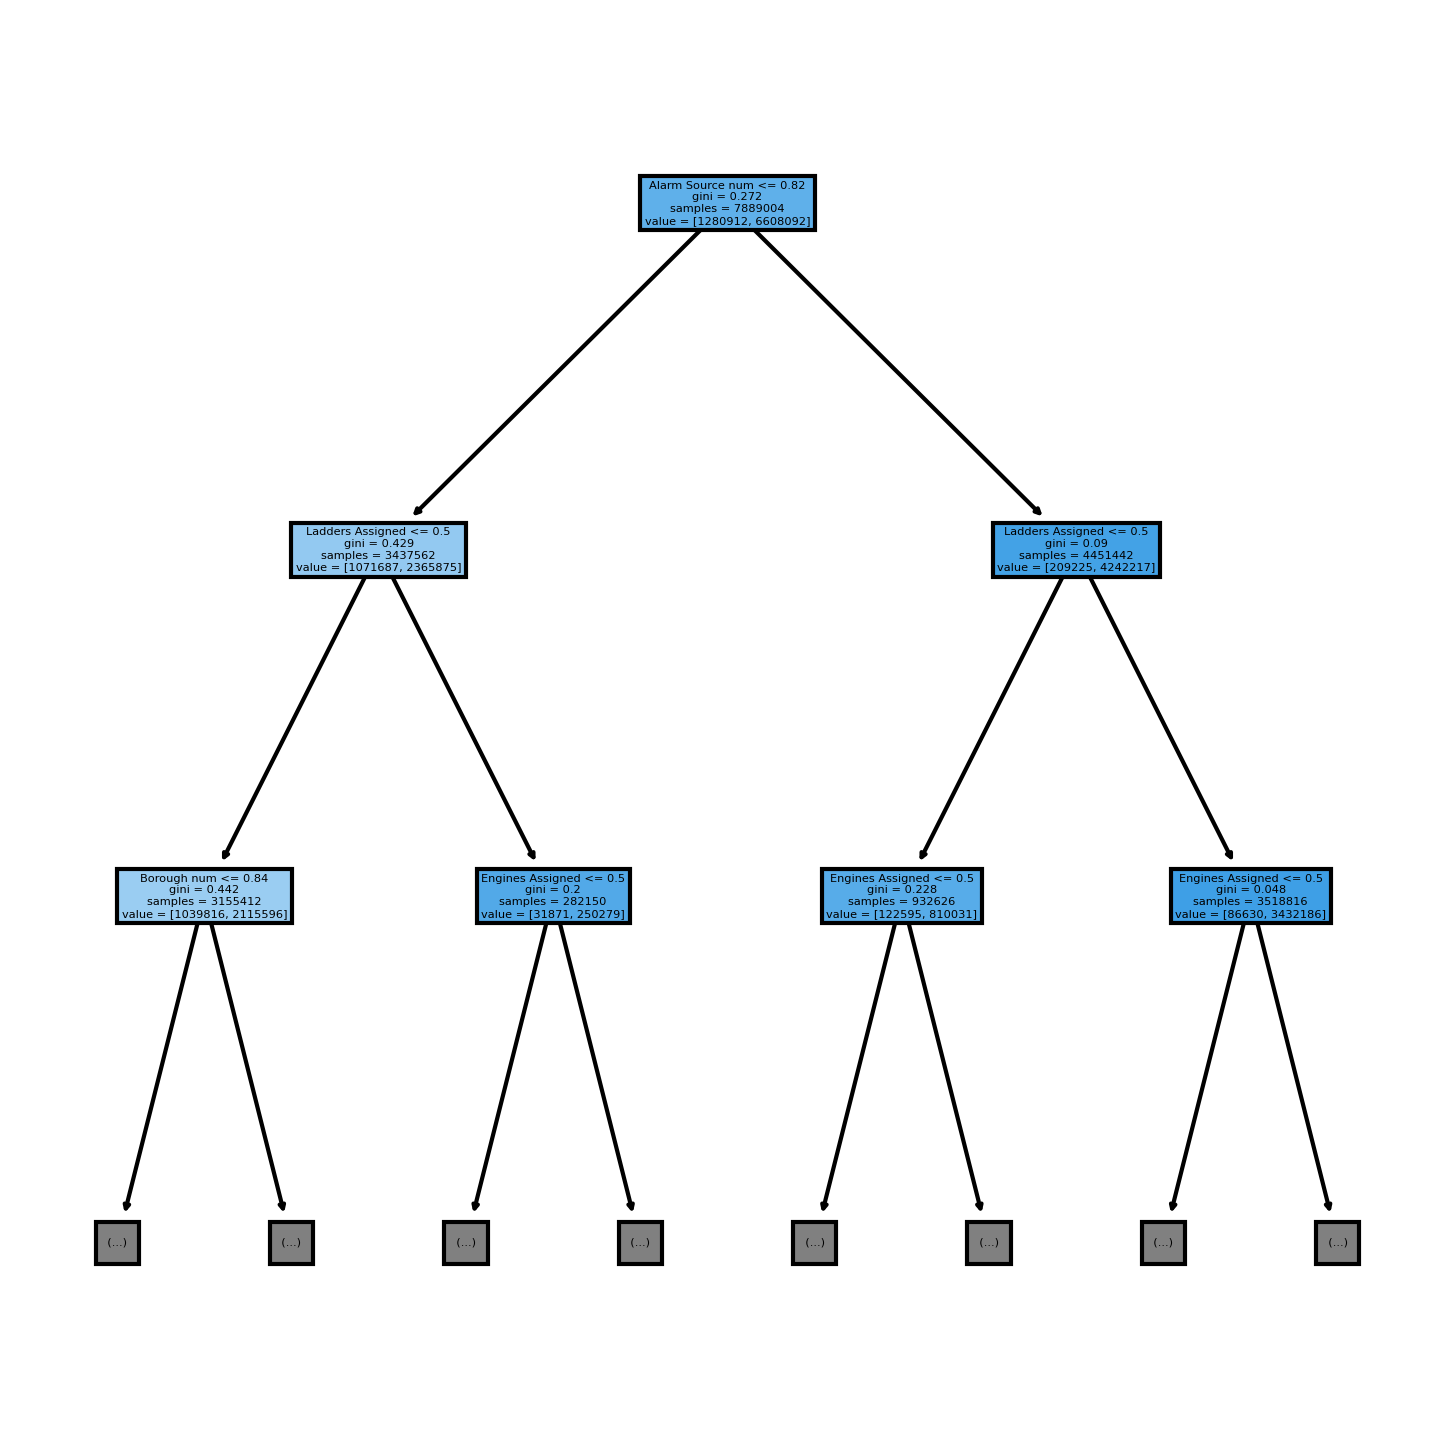

In [11]:
# Plot out tree
# Use feature-importance to test variables
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi = 300)
tree.plot_tree(dt, max_depth = 2, feature_names = X.columns, filled = True)
plt.show()

In [12]:
fi1 = dt.feature_importances_
fi1 = pd.Series(data = fi1, index = X.columns)
fi1.sort_values(ascending = False, inplace = True)

C:\Users\jonat\AppData\Local\Temp\ipykernel_5464\1443521375.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

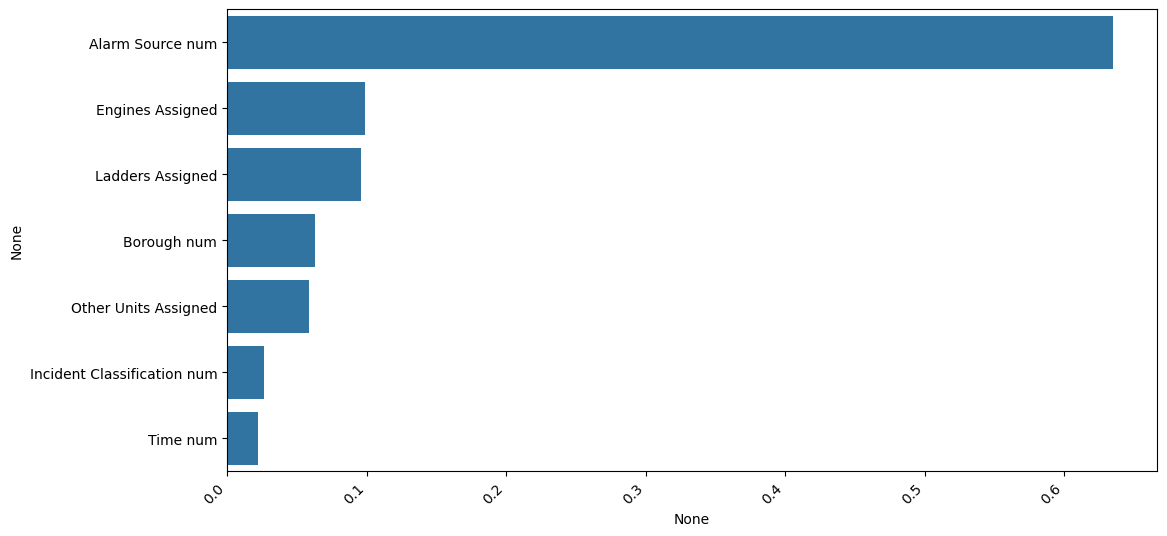

In [13]:
plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi1, y = fi1.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [14]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators= 10, random_state=42)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [16]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}" )

Random Forest Accuracy: 0.8417783325863024


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  16013  304962]
 [   7091 1644186]]


C:\Users\jonat\AppData\Local\Temp\ipykernel_5464\2139645486.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

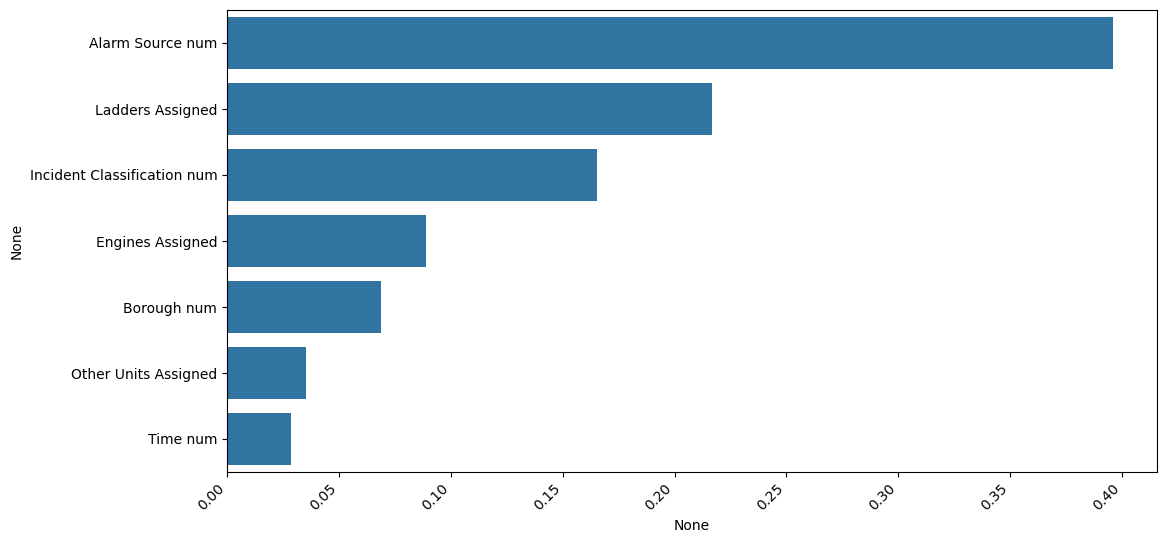

In [18]:
fi2 = rf.feature_importances_
fi2 = pd.Series(data = fi2, index = X.columns)
fi2.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi2, y = fi2.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [19]:
# Gradient-Boosting Classification

gb = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.05, random_state=42, max_features=6)

In [20]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=6, n_estimators=10,
                           random_state=42)

In [21]:
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient-Boosting Accuracy: {accuracy}')

Gradient-Boosting Accuracy: 0.8372545699028319


In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[      0  320975]
 [      0 1651277]]


C:\Users\jonat\AppData\Local\Temp\ipykernel_5464\1313124604.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

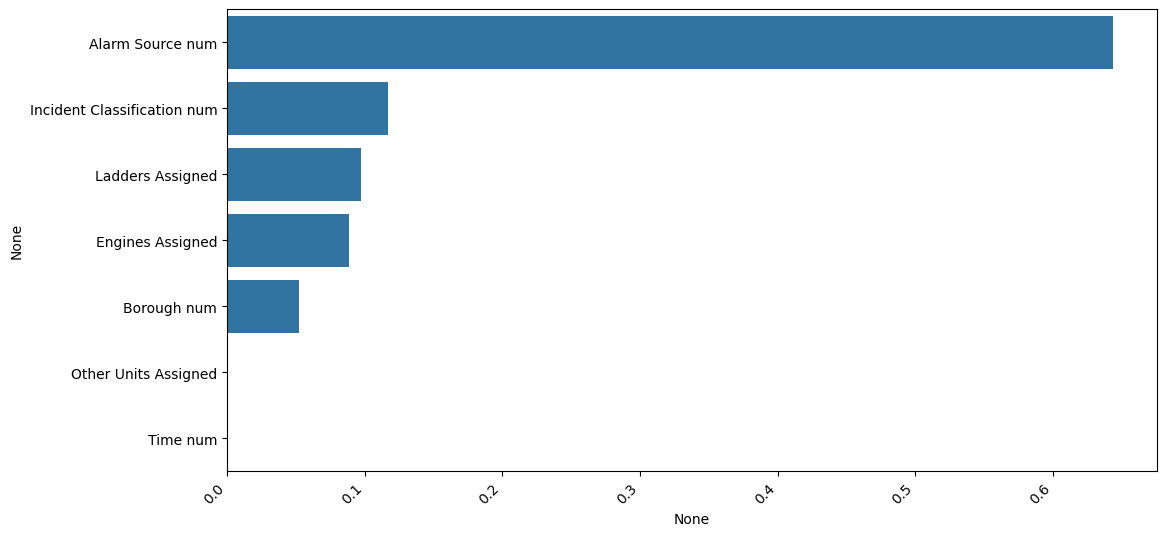

In [23]:
fi3 = gb.feature_importances_
fi3 = pd.Series(data = fi3, index = X.columns)
fi3.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi3, y = fi3.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [24]:
#ADA Boost Classifier

ada = AdaBoostClassifier(random_state=42, n_estimators=10)

In [25]:
ada.fit(X_train, y_train)

c:\Users\jonat\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10, random_state=42)

In [26]:
y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'ADA Boost Accuracy: {accuracy}')

ADA Boost Accuracy: 0.8368824065078905


In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[   3545  317430]
 [   4279 1646998]]


C:\Users\jonat\AppData\Local\Temp\ipykernel_5464\1943739812.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

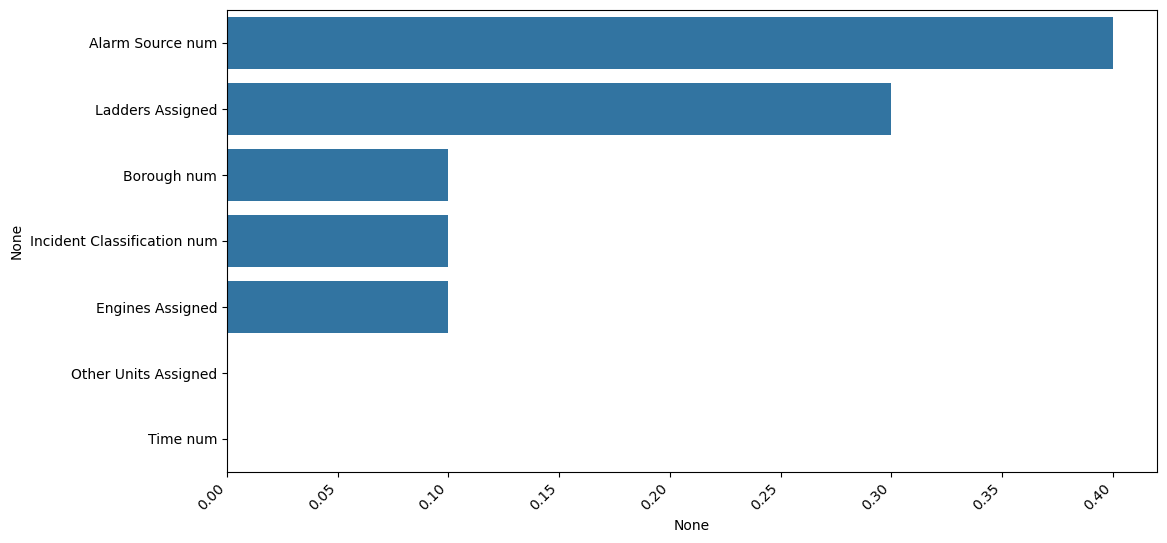

In [28]:
fi4 = ada.feature_importances_
fi4 = pd.Series(data = fi4, index = X.columns)
fi4.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi4, y = fi4.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [29]:
# KNeighbors Classifier

# knn = KNeighborsClassifier(n_neighbors= 2)

In [30]:
# knn.fit(X_train, y_train)

In [31]:
## y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'KNN Classifier Accuracy: {accuracy}')


In [32]:
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(conf_matrix)

In [33]:
# Logistic Regression

lg = LogisticRegression()

In [34]:
lg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.837335188403916


In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[    227  320748]
 [     68 1651209]]


In [37]:
print("fi1 shape (DT):", fi1.shape)
print("fi2 shape (RF):", fi2.shape)
print("fi3 shape (GB):", fi3.shape)
print("fi4 shape (Ada):", fi4.shape)

fi1 shape (DT): (7,)
fi2 shape (RF): (7,)
fi3 shape (GB): (7,)
fi4 shape (Ada): (7,)


In [38]:
# Average the feature importance values
total_importance = (fi1 + fi2 + fi3 + fi4) / 4

print(total_importance)

Alarm Source num               0.518492
Borough num                    0.071189
Engines Assigned               0.094076
Incident Classification num    0.102285
Ladders Assigned               0.177519
Other Units Assigned           0.023637
Time num                       0.012802
dtype: float64


In [39]:
features = X.columns

importance_df = pd.DataFrame({
    'DecisionTree': fi1,
    'RandomForest': fi2,
    'GradientBoosting': fi3,
    'AdaBoost': fi4,
})

importance_df

,DecisionTree,RandomForest,GradientBoosting,AdaBoost
Alarm Source num,0.634688,0.395810,0.643469,0.4
Borough num,0.063396,0.068861,0.052501,0.1
Engines Assigned,0.098588,0.088820,0.088894,0.1
Incident Classification num,0.026341,0.165543,0.117255,0.1
Ladders Assigned,0.095789,0.216882,0.097406,0.3
Other Units Assigned,0.058735,0.035338,0.000474,0.0
Time num,0.022464,0.028745,0.000000,0.0


In [50]:
# Printing the important features

alarm_source_val = data.groupby('Alarm Source')['Alarm Source num'].mean().reset_index()
alarm_source_val.sort_values(['Alarm Source num'], ascending=True, inplace=True)
alarm_source_val

,Alarm Source,Alarm Source num
4,EMS Link/Medical,0.670871
8,PD Link/Medical,0.686978
14,Verbal,0.801265
13,VERBAL,0.816113
0,911,0.824593
5,EMS-911,0.856437
3,EMS,0.868775
7,ERS No Contact,0.933494
6,ERS,0.945782
9,PHONE,0.955027


Based off this table, we need to focus on improving EMS Link/Medical alarm systems and PD Link/Medical alarm systems

In [51]:
incident_classification_val = data.groupby('Incident Classification')['Incident Classification num'].mean().reset_index()
incident_classification_val.sort_values(['Incident Classification num'], ascending=True, inplace=True)
incident_classification_val

,Incident Classification,Incident Classification num
0,Medical Emergencies,0.695635
1,Medical MFAs,0.879913
4,NonStructural Fires,0.927349
2,NonMedical Emergencies,0.951887
3,NonMedical MFAs,0.955955
5,Structural Fires,0.968542


Based off this table we need to focus on improving the response time of Medical Emergencies